# Training from scratch

Our task is to learn the ff. dataset consisting of noisy measurements around a quadratic curve:

In [1]:
from chapter import *

In [2]:
%config InlineBackend.figure_format = "svg"
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

N = 1500
X = np.linspace(-1, 5, N)
Y = X ** 2 + 0.5 * np.random.normal(size=N, scale=3)

Helper for loading the samples:

In [3]:
import random
random.seed(RANDOM_SEED)

class DataLoader:
    def __init__(self, dataset, batch_size):
        """Iterate over a partition of the dataset."""
        self.batch_size = batch_size
        self.dataset = [(Node(x), Node(y)) for x, y in dataset]
    
    def load(self):
        return random.sample(self.dataset, self.batch_size)

    def __len__(self):
        return len(self.dataset)

The function `optim_step` implements one step of SGD. Note that gradients accumulate, so we can implement batch size. But for simplicity, we only consider one training instance per update. Here `loss_fn` is the MSE between two nodes.

In [4]:
def optim_step(model, lr=1.0):
    for p in model.parameters():
        p.data -= lr * p.grad 

def loss_fn(y_pred, y_true):
    return (y_pred - y_true) ** 2

Running the training algorithm:

In [5]:
from tqdm.notebook import tqdm

def train(model, dataset, steps, lr=0.1, batch_size=32):
    dataloader = DataLoader(dataset, batch_size)
    history = []
    for _ in tqdm(range(steps)):
        for x, y in dataloader.load():
            loss = loss_fn(model([x]), y)
            loss.backward()
            optim_step(model, lr=lr)
            
            model.zero_grad()
            history.append(loss.data)
    
    return history

dataset = list(zip(X, Y))
model = MLP(1, [8, 4, 1], "tanh")
losses = train(model, dataset, lr=0.003, batch_size=8, steps=5000)

  0%|          | 0/5000 [00:00<?, ?it/s]

Loss curve moving average decreasing:

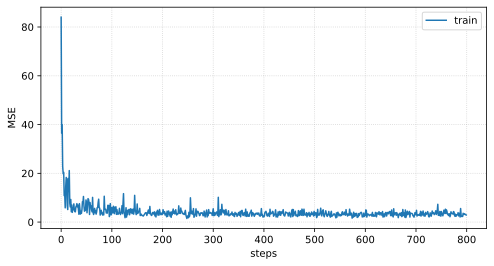

In [6]:
w = 50
loss_avg = np.array(losses).reshape(-1, w).mean(axis=1)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(loss_avg, label="train")
ax.grid(linestyle="dotted", alpha=0.6)
ax.set_ylabel("MSE")
ax.set_xlabel("steps")
ax.legend();

Model learned: ヾ( ˃ᴗ˂ )◞ • *✰

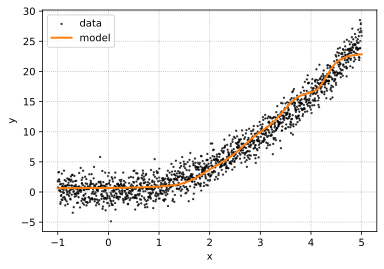

In [7]:
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, label="data", s=2, alpha=0.7, color="black")
plt.plot(X, [model([Node(x)]).data for x in X], label="model", color="C1", linewidth=2)

plt.ylabel("y")
plt.xlabel("x")
plt.grid(linestyle="dotted")
plt.legend();

Model graph visualization:

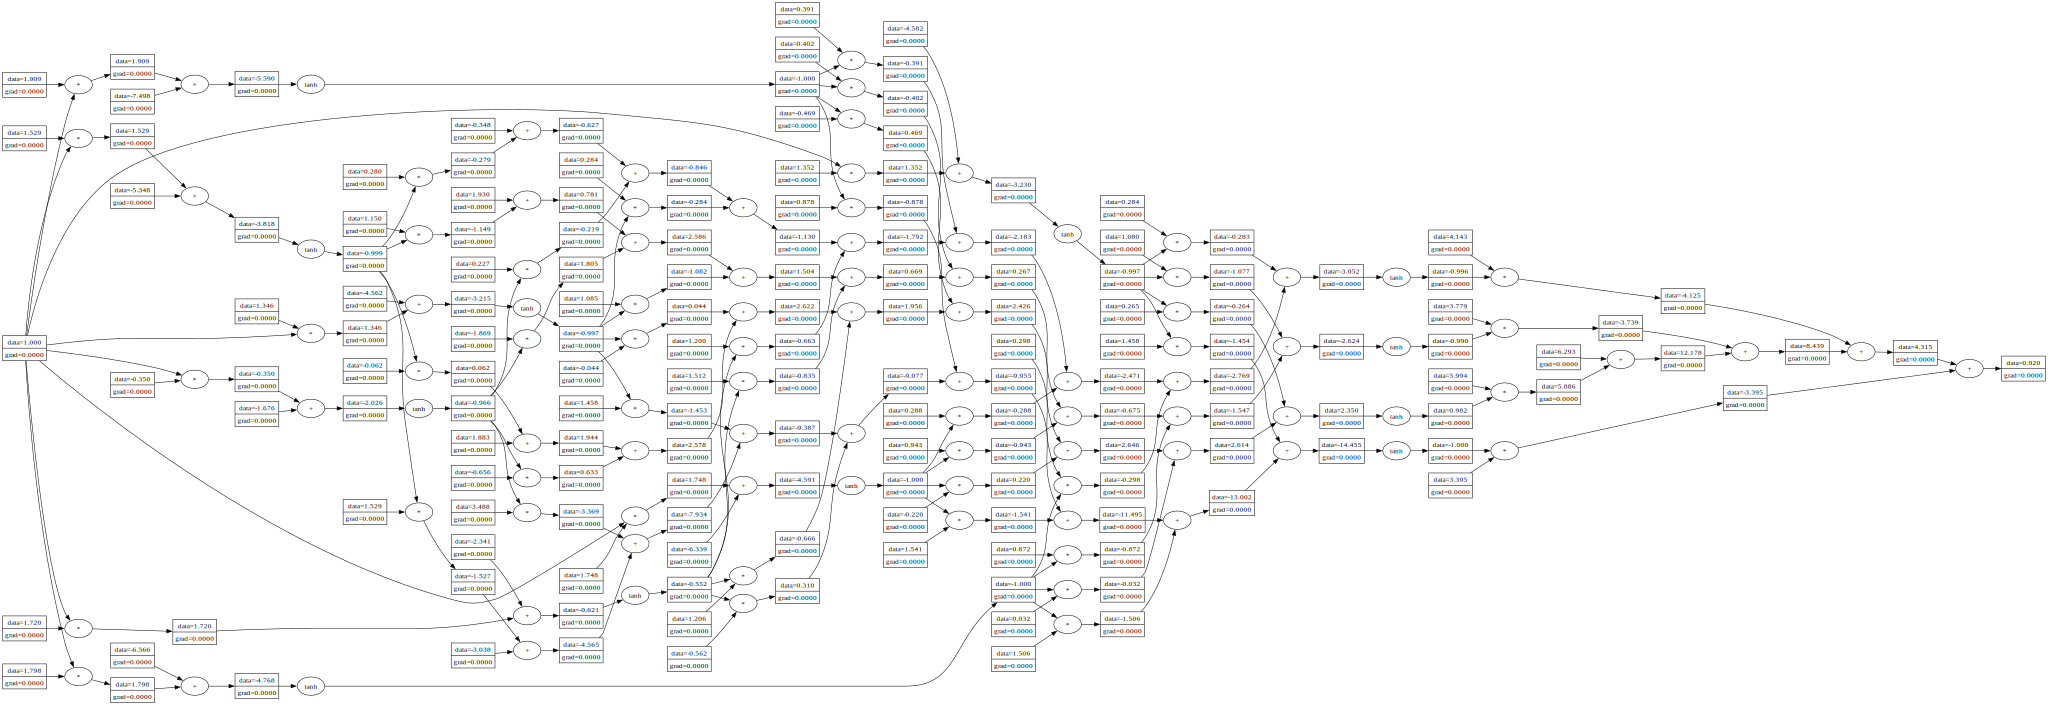

In [8]:
x = Node(1.0)
pred = model([x])
draw_graph(pred)